### This notebook preprocess the Amazon Review Dataset for sentiment analysis model training

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
# Review Reviews dataset
df = pd.read_csv(r"D:\ML_Projects\Amazon-Review-Sentiment-Analysis-System\Data\amazon_reviews.csv")

In [3]:
df.head()

,ProfileName,Summary,Text,Score
0,delmartian,Good Quality Dog Food,I have bought several of the Vitality canned d...,5
1,dll pa,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
2,"Natalia Corres ""Natalia Corres""","""Delight"" says it all",This is a confection that has been around a fe...,4
3,Karl,Cough Medicine,If you are looking for the secret ingredient i...,2
4,"Michael D. Bigham ""M. Wassir""",Great taffy,Great taffy at a great price. There was a wid...,5


In [4]:
print(f"Total number of reviews: {len(df['Text'])}")

Total number of reviews: 568430


In [5]:
print(f"Unique class labels for review scores: {df['Score'].unique()}")

Unique class labels for review scores: [5 1 4 2 3]


In [6]:
print(f"Review scores occurrence percentage:\n {df.groupby('Score').size() / len(df) * 100}")

Review scores occurrence percentage:
 Score
1     9.193920
2     5.237056
3     7.501363
4    14.188730
5    63.878930
dtype: float64


In [7]:
df['Text_Length'] = df['Text'].map(lambda l: len(l.split()))

In [8]:
df.head()

,ProfileName,Summary,Text,Score,Text_Length
0,delmartian,Good Quality Dog Food,I have bought several of the Vitality canned d...,5,48
1,dll pa,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1,31
2,"Natalia Corres ""Natalia Corres""","""Delight"" says it all",This is a confection that has been around a fe...,4,94
3,Karl,Cough Medicine,If you are looking for the secret ingredient i...,2,41
4,"Michael D. Bigham ""M. Wassir""",Great taffy,Great taffy at a great price. There was a wid...,5,27


In [9]:
print(f"Least number of words \t\t:  {df['Text_Length'].min()}")
print(f"Most number of words \t\t:  {df['Text_Length'].max()}")
print(f"Median of number of words \t:  {df['Text_Length'].median()}")
print(f"Mean of number of words \t:  {df['Text_Length'].mean()}")

Least number of words 		:  3
Most number of words 		:  3432
Median of number of words 	:  56.0
Mean of number of words 	:  80.26340270569816


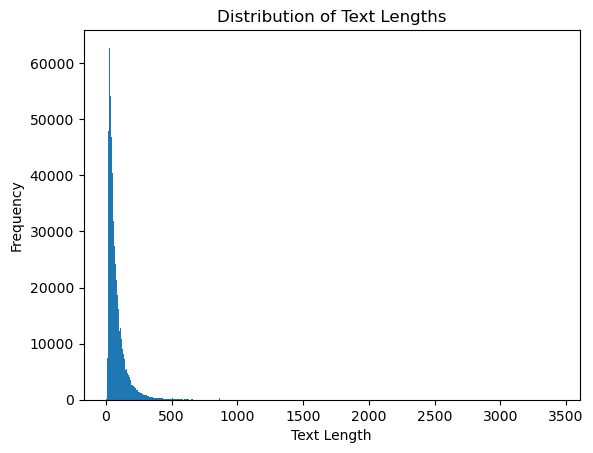

In [10]:
plt.hist(df['Text_Length'], bins=500)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [28]:
ln_min = 0.2
print("Count of reviews with 'Text_Length' less than 20% of the mean: ",
      len(df[df['Text_Length'] < df['Text_Length'].mean()*ln_min]))
print("Proportion of reviews with 'Text_Length' greater than 20% of the mean: ",
      len(df[df['Text_Length'] > df['Text_Length'].mean()*ln_min])/len(df))
print("Maximum 'Text_Length' among reviews with 'Text_Length' less than 20% of the mean: ",
      df[df['Text_Length'] < df['Text_Length'].mean()*ln_min]['Text_Length'].max())

ln_max = 1.6
print("Count of reviews with 'Text_Length' greater than 160% of the mean: ", 
      len(df[df['Text_Length'] > df['Text_Length'].mean()*ln_max]))
print("Proportion of reviews with 'Text_Length' greater than 160% of the mean: ",
      len(df[df['Text_Length'] > df['Text_Length'].mean()*ln_max])/len(df))
print("Minimum 'Text_Length' among reviews with 'Text_Length' greater than 160% of the mean: ", 
      df[df['Text_Length'] > df['Text_Length'].mean()*ln_max]['Text_Length'].min())

Count of reviews with 'Text_Length' less than 20% of the mean:  7549
Proportion of reviews with 'Text_Length' greater than 20% of the mean:  0.9867195608958007
Maximum 'Text_Length' among reviews with 'Text_Length' less than 20% of the mean:  16
Count of reviews with 'Text_Length' greater than 160% of the mean:  89695
Proportion of reviews with 'Text_Length' greater than 160% of the mean:  0.15779427546047886
Minimum 'Text_Length' among reviews with 'Text_Length' greater than 160% of the mean:  129


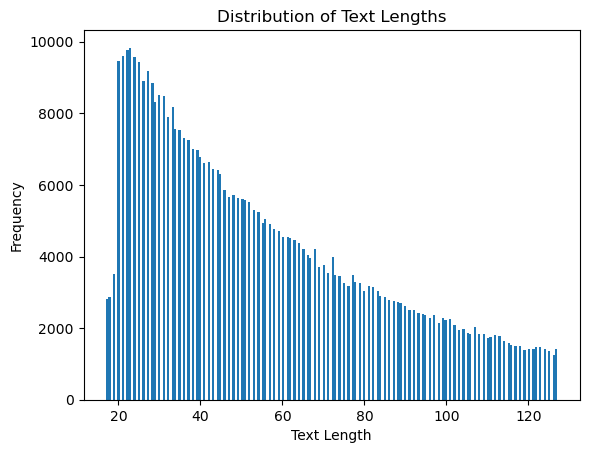

In [12]:
text_len = df[(df['Text_Length'] > df['Text_Length'].mean()*0.2) & (df['Text_Length'] < df['Text_Length'].mean()*1.59)]
plt.hist(text_len['Text_Length'], bins=200)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [13]:
words = set(" ".join(df['Text']).split())
words_with_special_chars = [word for word in words if len(re.findall(r'[^\w\s]', word)) > 1]
print(f"Number of unique words in the dataset: {len(words_with_special_chars)}")

Number of unique words in the dataset: 244901


In [14]:
for i, (_, row) in enumerate(df.iterrows()):
    txt = row['Text']
    if re.search(r"\d{1,2}:\d{2}", txt):
        print(txt)
    if i > 10000:
        break

<span class="tiny"> Length:: 0:26 Mins<br /><br /></span>The expiration date is 21 months from the day I bought this product. The tuna, tomato combination is delicious. This is one of the many items I re-order on Amazon every month or so.<br />edit: added a short video, so you see what this combination looks like.<br /><br />I was wearing one of those headlamps, but I didn't do a good job focusing on the tuna.<br />I should film it over, but it doesn't look like many people view this product anyway.
This is a classic ramen choice.  Our kids, 3-6 love this.  When we're RVing, we have a case of this on hand.  A bowl, some water, and 2:30 in the microwave, and we've got our instant meal. We break up the noodles while still sealed in the package.  This helps the kids not make a mess when trying to eat them. They don't seem to tire of these; and we're not overly offended by the nature of the just-add-water-product. We each had our ramen-eating-college-days. These also make a great item to h

In [15]:
def text_preprocess(txt):
    txt = re.sub(r'Length:: \d{1,2}:\d{2} Mins', ' ', txt)
    txt = re.sub(r'<[^>]*>', ' ', txt)
    txt = re.sub(r',+', ',', txt)
    txt = re.sub(r'([^\w\s])\1+', ' ', txt)
    txt = re.sub(r'(?<=\s)[^\w\s]+(?:\s+[^\w\s]+)+(?=\s)', ' ', txt)
    txt = re.sub(r'\s+', ' ', txt)
    txt = txt.strip()
    txt = txt.lower()
    return txt

df['Text_Preprocessed'] = df['Text'].apply(lambda l: text_preprocess(l))
df_preprocessed = df.drop(["ProfileName", "Summary", "Text", "Text_Length"], axis=1)

df_preprocessed.to_csv(r"D:\ML_Projects\Amazon-Review-Sentiment-Analysis-System\Data\amazon_reviews_preprocessed.csv", index=False)

In [16]:
df_preprocessed['Text_Length'] = df_preprocessed['Text_Preprocessed'].map(lambda l: len(l.split()))

In [17]:
print(f"Least number of words \t\t:  {df_preprocessed['Text_Length'].min()}")
print(f"Most number of words \t\t:  {df_preprocessed['Text_Length'].max()}")
print(f"Median of number of words \t:  {df_preprocessed['Text_Length'].median()}")
print(f"Mean of number of words \t:  {df_preprocessed['Text_Length'].mean()}")

Least number of words 		:  0
Most number of words 		:  3408
Median of number of words 	:  56.0
Mean of number of words 	:  79.85943563851309


In [27]:
ln_min = 0.2
print("Count of reviews with 'Text_Length' less than 20% of the mean: ",
      len(df_preprocessed[df_preprocessed['Text_Length'] < df_preprocessed['Text_Length'].mean()*ln_min]))
print("Proportion of reviews with 'Text_Length' greater than 20% of the mean: ",
      len(df_preprocessed[df_preprocessed['Text_Length'] > df_preprocessed['Text_Length'].mean()*ln_min])/len(df_preprocessed))
print("Maximum 'Text_Length' among reviews with 'Text_Length' less than 20% of the mean: ",
      df_preprocessed[df_preprocessed['Text_Length'] < df_preprocessed['Text_Length'].mean()*ln_min]['Text_Length'].max())

ln_max = 1.6
print("Count of reviews with 'Text_Length' greater than 160% of the mean: ", 
      len(df_preprocessed[df_preprocessed['Text_Length'] > df_preprocessed['Text_Length'].mean()*ln_max]))
print("Proportion of reviews with 'Text_Length' greater than 160% of the mean: ",
      len(df_preprocessed[df_preprocessed['Text_Length'] > df_preprocessed['Text_Length'].mean()*ln_max])/len(df_preprocessed))
print("Minimum 'Text_Length' among reviews with 'Text_Length' greater than 160% of the mean: ", 
      df_preprocessed[df_preprocessed['Text_Length'] > df_preprocessed['Text_Length'].mean()*ln_max]['Text_Length'].min())

Count of reviews with 'Text_Length' less than 20% of the mean:  4758
Proportion of reviews with 'Text_Length' greater than 20% of the mean:  0.9916295762011154
Maximum 'Text_Length' among reviews with 'Text_Length' less than 20% of the mean:  15
Count of reviews with 'Text_Length' greater than 160% of the mean:  89996
Proportion of reviews with 'Text_Length' greater than 160% of the mean:  0.1583238041623419
Minimum 'Text_Length' among reviews with 'Text_Length' greater than 160% of the mean:  128


In [ ]:
df_preprocessed = df_preprocessed[(df_preprocessed['Text_Length'] > df_preprocessed['Text_Length'].mean()*0.2) &
                                  (df_preprocessed['Text_Length'] < df_preprocessed['Text_Length'].mean()*1.60)]

print(f"Number of reviews after text preprocessing: {len(df_preprocessed)}")

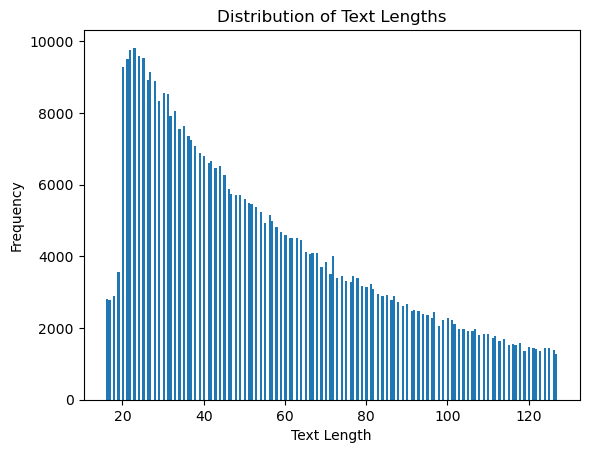

In [ ]:
plt.hist(df_preprocessed['Text_Length'], bins=200)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [ ]:
words = set(" ".join(df_preprocessed['Text_Preprocessed']).split())
words_with_special_chars = [word for word in words if len(re.findall(r'[^\w\s]', word)) > 1]
print(f"Number of unique words in the dataset after text preprocessing: {len(words_with_special_chars)}")

Number of unique words in the dataset: 55833
